Introdução

Para um investidor, compreender e gerenciar riscos é crucial para atingir quaisquer objetivos financeiros. Independentemente da estratégia de investimento, a capacidade de avaliar e mitigar riscos é um dos principais factores que determinam o sucesso ou o fracasso a longo prazo.

Quando se trata do risco relacionado ao investimento, algumas estatísticas são importantes: desvio padrão, índice de Sharpe, índice de Sortino, beta, "drawdown", valor em risco, valor condicional em risco e R ao quadrado. Ao compreender essas métricas e aproveitar seus recursos, o investidor estará preparado para tomar decisões informadas, otimizar suas estratégias de investimento e proteger seu capital.

A gestão eficaz de riscos é fundamental para o sucesso financeiro. Comecemos por compreender o conceito de risco e os seus diferentes tipos. Em finanças, o risco refere-se à incerteza ou potencial de perda associada aos retornos do investimento. Os três principais tipos de riscos incluem (Faccini, 2015):
Risco de Mercado: Este risco decorre de movimentos globais do mercado, tais como alterações nas taxas de juro, condições económicas ou eventos geopolíticos. O risco de mercado afeta todos os investimentos e não pode ser totalmente eliminado.
Risco de Crédito: O risco de crédito surge da possibilidade de incumprimento por parte dos mutuários ou contrapartes. Afecta investidores que detêm obrigações, emprestam dinheiro ou participam em transações baseadas em crédito.
Risco de Liquidez: O risco de liquidez refere-se à facilidade de comprar ou vender ativos sem impactar significativamente os seus preços. Os investimentos em ativos ilíquidos, como imóveis ou private equity, apresentam maiores riscos de liquidez.

    Market Risk: This risk stems from overall market movements, such as changes in interest rates, economic conditions, or geopolitical events. Market risk affects all investments and cannot be eliminated entirely.
    Credit Risk: Credit risk arises from the possibility of default by borrowers or counterparties. It affects investors who hold bonds, lend money, or engage in credit-based transactions.
    Liquidity Risk: Liquidity risk pertains to the ease of buying or selling assets without significantly impacting their prices. Investments in illiquid assets, such as real estate or private equity, pose higher liquidity risk.

Risk management involves identifying and quantifying these risks, assessing their potential impact, and implementing strategies to mitigate or manage them effectively. By understanding the different types of risks, investors can make informed decisions and design robust investment portfolios.
Section 2: Understanding Risk Management Statistics

Before diving into Python code, let’s gain a deeper understanding of the risk management statistics we’ll be exploring.

    Standard Deviation: Standard deviation measures the dispersion of a dataset around its mean. In finance, it quantifies the volatility or variability of investment returns. Higher standard deviation indicates greater variability and higher risk.
    Sharpe Ratio: The Sharpe ratio evaluates the risk-adjusted return of an investment. It measures the excess return earned per unit of risk, taking into account the risk-free rate. A higher Sharpe ratio indicates a more favorable risk-to-reward profile.
    Sortino Ratio: Similar to the Sharpe ratio, the Sortino ratio assesses risk-adjusted returns. However, it focuses on downside risk by considering only negative returns. It provides a more accurate picture of risk by differentiating between downside volatility and overall volatility.
    Beta: Beta measures an investment’s sensitivity to market movements. It quantifies the extent to which an asset’s price fluctuates concerning the overall market. A beta greater than 1 implies higher volatility than the market, while a beta less than 1 suggests lower volatility.

Rebaixamento máximo: O rebaixamento máximo mede o maior declínio no valor do investimento desde um pico até um mínimo subsequente. Ele fornece insights sobre o pior cenário para um investimento e ajuda a avaliar o risco negativo.
    
Valor em Risco (VaR): O VaR quantifica a perda potencial máxima em um nível de confiança especificado. Ajuda os investidores a compreender o risco negativo dos seus investimentos, fornecendo uma estimativa de perdas potenciais.
    
    
Valor em risco condicional (CVaR): O CVaR, também conhecido como déficit esperado, captura perdas extremas além do nível de VaR. Fornece informações adicionais sobre a extensão potencial das perdas além do VaR estimado.
    R-quadrado: R-quadrado mede a correlação entre um ativo e um benchmark. Indica a proporção do movimento do ativo que pode ser explicada pelo benchmark. Um valor de R ao quadrado mais alto sugere uma relação mais forte.

Ao compreender estas estatísticas de gestão de risco, os investidores podem obter informações sobre os riscos associados aos seus investimentos e tomar decisões informadas para atingir os seus objetivos financeiros.

In [ ]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import datetime as dt

In [ ]:
ticker = "AAPL" # Ticker symbol for the desired asset
benchmark_ticker = "^GSPC" # Ticker symbol for the benchmark index
start_date = "2023-01-01" # Start date for obtaining historical price data
end_date = "2023-07-31" # End date for obtaining historical price data

# Fetch historical price data for the asset and benchmark from a reliable data source
asset_data = yf.download(ticker, start_date, end_date)
benchmark_data = yf.download(benchmark_ticker, start_date, end_date)

# Extract the "close" prices from the data
asset_prices = asset_data["Close"]
benchmark_prices = benchmark_data["Close"]

# Calculate the asset returns and benchmark returns
asset_returns = asset_prices.pct_change().dropna()
benchmark_returns = benchmark_prices.pct_change().dropna()

# Calculate the average return
average_return = asset_returns.mean()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Standard Deviation
standard_deviation = asset_returns.std()

In [ ]:
# Sharpe Ratio
risk_free_rate = 0.03  # Assume a risk-free rate of 3%
sharpe_ratio = (average_return - risk_free_rate) / standard_deviation

In [ ]:
# Sortino Ratio
downside_returns = asset_returns[asset_returns < 0]
average_downside_return = downside_returns.mean()
sortino_ratio = (average_return - risk_free_rate) / downside_returns.std()

In [ ]:
# Beta
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
beta = model.params[1]

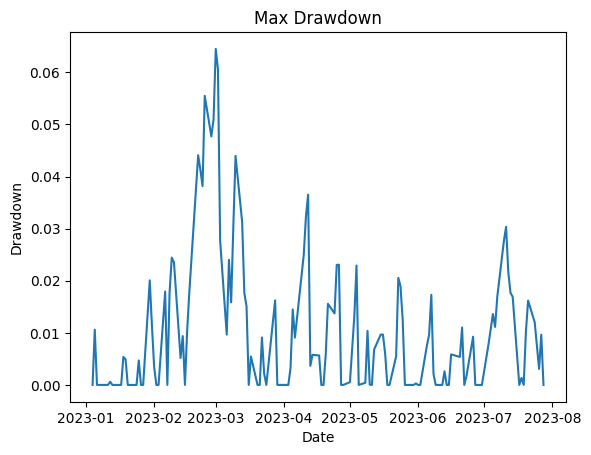

In [ ]:
# Max Drowdown
cum_returns = (asset_returns + 1).cumprod()
cum_max = cum_returns.cummax()
drawdown = (cum_max - cum_returns) / cum_max
plt.plot(drawdown)
plt.title('Max Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()
max_drawdown = drawdown.max()

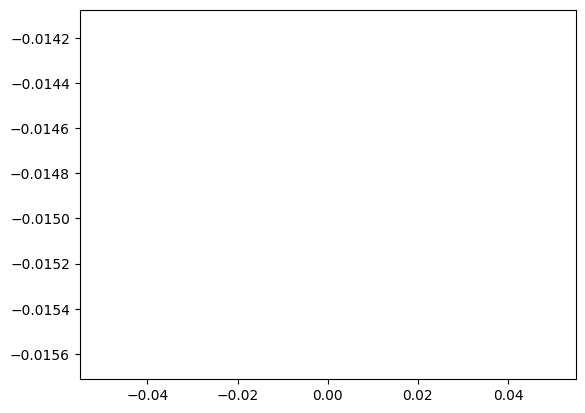

In [ ]:
# Value at Risk (VaR)
confidence_level = 0.95
var = np.percentile(asset_returns, 100 - confidence_level * 100)
plt.plot(var)
plt.show()

In [ ]:
# Conditional Value at Risk (CVaR)
tail_returns = asset_returns[asset_returns < var]
cvar = tail_returns.mean()

In [ ]:
# R-squared
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
r_squared = model.rsquared

TypeError: ignored

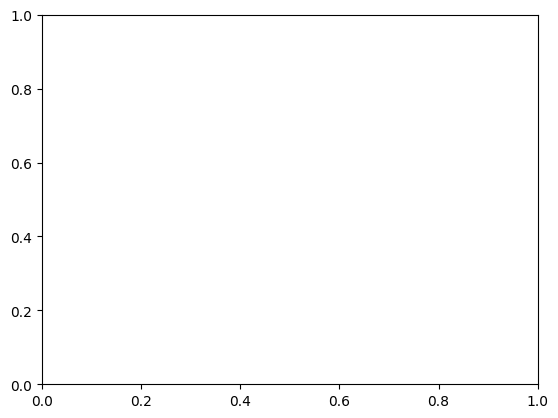

In [ ]:
plt.plot(model)
plt.show()